# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SAT2017 = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\sat_2017.csv')
#SAT2017['Participation'] = SAT2017['Participation'].values.tolist()
SAT2017['Participation'] = [float(x.replace('%','')) for x in SAT2017['Participation']]
#SAT2017.rename(columns={'Participation': 'SAT Participation'}, inplace=True)
SAT2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [3]:
SAT2017.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65.0,561,541,1102
47,Washington,64.0,541,534,1075
48,West Virginia,14.0,558,528,1086
49,Wisconsin,3.0,642,649,1291
50,Wyoming,3.0,626,604,1230


In [4]:
ACT2017 = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\act_2017.csv')
#ACT2017['Participation'] = ACT2017['Participation'].values.tolist()
ACT2017['Participation'] = [float(x.replace('%','')) for x in ACT2017['Participation']]
#ACT2017.rename(columns={'Participation': 'ACT Participation'}, inplace=True)
ACT2017['Composite'] = ACT2017['Composite'].values.tolist()
ACT2017['Composite'] = [float(x.replace('x','')) for x in ACT2017['Composite']]
ACT2017.drop(ACT2017.index[[0]], inplace=True)
ACT2017.reset_index(drop=True, inplace=True)
ACT2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8


In [5]:
ACT2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
46,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [6]:
#Code: Done in previous step (do not re-run, it will return Participation column to original type)
#SAT2017 = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\sat_2017.csv')
#ACT2017 = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [7]:
#Code:
SAT2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055
5,Colorado,11.0,606,595,1201
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
8,District of Columbia,100.0,482,468,950
9,Florida,83.0,520,497,1017


In [8]:
ACT2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#Answer:
#Data of SAT & ACT result of all 51 states in the US in 2017. Both SAT & ACT data are not clean & require modification prior to use.
#SAT 2017 data - need to change the participation column into float data type.
#ACT 2017 data - need to change the participation column into float data type, remove the first row: National result & remove 'x' from Wyoming - Composite).
#Both SAT & ACT have outliers SAT2017 Maryland Math = 52 & ACT2017 Maryland Science = 2.3.

#### 4a. Does the data look complete? 

In [9]:
SAT2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [10]:
ACT2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer: Both data are complete. No missing values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [11]:
SAT2017.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039
std,35.276632,45.666901,84.909119,92.494812
min,2.000000,482.000000,52.000000,950.000000
25%,4.000000,533.500000,522.000000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


In [12]:
ACT2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


Answer:
#min/max possible value for each test (SAT)#
#SAT Participation	Evidence-Based Reading and Writing	Math	Total
#min	2.000000	482.000000	52.000000	950.000000 ==> there is outlier max Math = 52
#max	100.000000	644.000000	651.000000	1295.000000

#min/max possible value for each test (ACT)#
#ACT Participation	English	Math	Reading	Science	Composite
#min	8.000000	16.300000	18.000000	18.100000	2.300000	17.800000 ==> there is outlier min Science = 2.3
#max	100.000000	25.500000	25.300000	26.000000	24.900000	25.500000

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [13]:
#code
SAT2017.iloc[20,3] = 524
ACT2017.iloc[20,5] = 23.2

In [14]:
SAT2017.describe() #to check if there is still outliers (thru the min / max) ==> No more outlier(s).

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


In [15]:
ACT2017.describe() #to check if there is still outliers (thru the min / max) ==> No more outlier(s).

,Participation,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
#code
SAT2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [17]:
ACT2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
#Outliers:
#SAT2017 - Maryland Math = 52 vs average Math = 547. It should be 524.
#ACT2017 - Maryland Science = 2.3 vs average Science = 23. It should be 23.2.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
#Done in previous step.
#code --> in SAT2017 replace Maryland Math with 524
#SAT2017.iloc[20,3] = 524
#code --> in ACT2017 replace Maryland Science with 23.2.
#ACT2017.iloc[20,5] = 23.2

- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
#code --> done in previous step
#SAT2017['Participation'] = [float(x.replace('%','')) for x in SAT2017['Participation']]
#ACT2017['Participation'] = [float(x.replace('%','')) for x in ACT2017['Participation']]
### removing % at column participation & change each indivual value to float type.


- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
#code
print(SAT2017.isnull().sum())
print('')
print(ACT2017.isnull().sum())

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64


- Display the data types again to confirm they are correct.

In [21]:
#Code
print(SAT2017.dtypes)
print("")
print(ACT2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
#code
SAT2017.columns = ['state','sat_participation2017','sat_read_write2017','sat_math2017','sat_total2017']
SAT2017.head()

,state,sat_participation2017,sat_read_write2017,sat_math2017,sat_total2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [23]:
ACT2017.columns = ['state','act_participation2017','act_eng2017','act_math2017','act_read2017','act_science2017','act_composite2017']
ACT2017.head()

,state,act_participation2017,act_eng2017,act_math2017,act_read2017,act_science2017,act_composite2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 
state|object|SAT 2017| Participating state
sat_participation2017|float64|SAT 2017|SAT State Participation Rate
sat_read_write2017|int64|SAT 2017|Average Score Evidence-Based Reading and Writing
sat_math2017|int64|SAT 2017|Average Score Math
sat_total2017|int64|SAT 2017|Average Score Total
act_participation2017|float64|ACT 2017|ACT State Participation Rate
act_eng2017|float64|ACT 2017|Average Score English
act_math2017|float64|ACT 2017|Average Score Math
act_read2017|float64|ACT 2017|Average Score Evidence-Based Reading and Writing
act_science2017|float64|ACT 2017|Average Score Science
act_composite2017|float64|ACT 2017|Average Score Composite / Total

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
#code - Done in previous step.
#ACT2017.drop(ACT2017.index[[0]], inplace=True) --> deleting the National row in row 0.
#ACT2017.reset_index(drop=True, inplace=True) --> resetting the index / row after deletion (start from 0)
ACT2017.head()

,state,act_participation2017,act_eng2017,act_math2017,act_read2017,act_science2017,act_composite2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
#Code:
COMBINED2017 = pd.merge(SAT2017, ACT2017, how='outer', on='state')
COMBINED2017.head()

,state,sat_participation2017,sat_read_write2017,sat_math2017,sat_total2017,act_participation2017,act_eng2017,act_math2017,act_read2017,act_science2017,act_composite2017
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
#code
COMBINED2017.to_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [27]:
SAT2018 = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\sat_2018.csv')
ACT2018 = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\act_2018.csv')

In [28]:
SAT2018.drop([39,47], axis=0, inplace=True) #deleting Puerto Rico & Virgin Island
SAT2018.reset_index(drop=True, inplace=True) #reset the index that it starts from zero
SAT2018['Participation Rate'] = [float(x.replace('%','')) for x in SAT2018['Participation Rate']] #delete % & change df the type
                                                                                                  #tofloat     

In [29]:
SAT2018.dtypes #to check df type if they have appropriate type

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

In [30]:
SAT2018.describe()

,Participation Rate,EBRW,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,46.627451,567.294118,557.470588,1125.294118
std,38.014187,45.317676,49.213963,94.442214
min,2.000000,497.000000,480.000000,977.000000
25%,4.500000,535.000000,521.500000,1062.500000
50%,52.000000,552.000000,547.000000,1099.000000
75%,79.500000,616.500000,600.500000,1229.500000
max,100.000000,643.000000,655.000000,1298.000000


In [31]:
ACT2018.drop([27,28], axis=0, inplace=True) #deleting Puerto 2 National rows
ACT2018.reset_index(drop=True, inplace=True) #reset the index that it starts from zero

In [32]:
ACT2018.dtypes #to check df type if they have appropriate type

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [33]:
ACT2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [34]:
SAT2018.columns = ['state','sat_participation2018','sat_read_write2018','sat_math2018','sat_total2018'] #renaming column
SAT2018.head()

,state,sat_participation2018,sat_read_write2018,sat_math2018,sat_total2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [35]:
#re-arranging ACT2018 column based on ACT2017
ACT2018 = ACT2018[['State','Percentage of Students Tested','Average English Score','Average Math Score','Average Reading Score','Average Science Score','Average Composite Score']]
#re-naming ACT2018 column based on ACT2017
ACT2018.columns = ['state','act_participation2018','act_eng2018','act_math2018','act_read2018','act_science2018','act_composite2018']
ACT2018.head()

,state,act_participation2018,act_eng2018,act_math2018,act_read2018,act_science2018,act_composite2018
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [36]:
COMBINED2018 = pd.merge(SAT2018, ACT2018, how='outer', on='state')
COMBINED2018.head()

,state,sat_participation2018,sat_read_write2018,sat_math2018,sat_total2018,act_participation2018,act_eng2018,act_math2018,act_read2018,act_science2018,act_composite2018
0,Alabama,6.0,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,43.0,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,29.0,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5.0,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,60.0,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [37]:
COMBINED2018.describe()

,sat_participation2018,sat_read_write2018,sat_math2018,sat_total2018,act_participation2018,act_eng2018,act_math2018,act_read2018,act_science2018,act_composite2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,46.627451,567.294118,557.470588,1125.294118,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,38.014187,45.317676,49.213963,94.442214,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,497.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.500000,535.000000,521.500000,1062.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,52.000000,552.000000,547.000000,1099.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,79.500000,616.500000,600.500000,1229.500000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv` (I'm saving it as 'finalsatact01.csv').

**Use this combined dataframe for the remainder of the project**.

In [38]:
finalsatact01 = pd.merge(COMBINED2017, COMBINED2018, how='outer', on='state')

In [39]:
finalsatact01.to_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_1\data\finalsatact01.csv')

In [40]:
finalsatact01.head()

,state,sat_participation2017,sat_read_write2017,sat_math2017,sat_total2017,act_participation2017,act_eng2017,act_math2017,act_read2017,act_science2017,...,sat_participation2018,sat_read_write2018,sat_math2018,sat_total2018,act_participation2018,act_eng2018,act_math2018,act_read2018,act_science2018,act_composite2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [41]:
#Code:
desc_stat_t = finalsatact01.describe().T
desc_stat_t

,count,mean,std,min,25%,50%,75%,max
sat_participation2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_read_write2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_eng2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_read2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [42]:
#code
from math import sqrt

def stdev(x):
    mean = sum(x)/len(x)
    sum_of_errors = 0
    normaliser= 1/(len(x)-1)
    for i in x:
        sum_of_errors += (i - mean)**2
    return((normaliser*sum_of_errors)**0.5)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [43]:
#Code:
all_states = finalsatact01.iloc[:,1:] #create a new data frame without column 'state'

sd = {col : stdev(all_states[col]) for col in all_states.columns}
sd

{'sat_participation2017': 35.276632270013046,
 'sat_read_write2017': 45.66690138768932,
 'sat_math2017': 47.12139516560329,
 'sat_total2017': 92.49481172519046,
 'act_participation2017': 32.14084201588683,
 'act_eng2017': 2.35367713980303,
 'act_math2017': 1.9819894936505533,
 'act_read2017': 2.0672706264873146,
 'act_science2017': 1.7393530462812443,
 'act_composite2017': 2.020694891154341,
 'sat_participation2018': 38.0141872380898,
 'sat_read_write2018': 45.31767607353539,
 'sat_math2018': 49.21396262898426,
 'sat_total2018': 94.44221389138377,
 'act_participation2018': 34.08097623567245,
 'act_eng2018': 2.4463562339793055,
 'act_math2018': 2.035764538177723,
 'act_read2018': 2.1672445684804105,
 'act_science2018': 1.8701137639716146,
 'act_composite2018': 2.1062781969951776}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [44]:
finalsatact01.std()

sat_participation2017    35.276632
sat_read_write2017       45.666901
sat_math2017             47.121395
sat_total2017            92.494812
act_participation2017    32.140842
act_eng2017               2.353677
act_math2017              1.981989
act_read2017              2.067271
act_science2017           1.739353
act_composite2017         2.020695
sat_participation2018    38.014187
sat_read_write2018       45.317676
sat_math2018             49.213963
sat_total2018            94.442214
act_participation2018    34.080976
act_eng2018               2.446356
act_math2018              2.035765
act_read2018              2.167245
act_science2018           1.870114
act_composite2018         2.106278
dtype: float64

#Answer
#Standard deviation result from three methods are all match.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

###############################################################################################################################
Simulating below 2 codes by changing the column parameter to get the lowest / highest participation rate & mean total/composite
###############################################################################################################################

In [46]:
#code
finalsatact01.sort_values('sat_participation2017', ascending=True).head(10)

,state,sat_participation2017,sat_read_write2017,sat_math2017,sat_total2017,act_participation2017,act_eng2017,act_math2017,act_read2017,act_science2017,...,sat_participation2018,sat_read_write2018,sat_math2018,sat_total2018,act_participation2018,act_eng2018,act_math2018,act_read2018,act_science2018,act_composite2018
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98,19.1,20.3,20.7,20.5,20.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,...,3.0,630,606,1236,100,18.2,18.1,18.9,18.6,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,632,1265,68,21.0,21.2,22.5,22.0,21.8
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,...,4.0,633,629,1262,100,19.5,19.7,20.5,20.0,20.0
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,618,612,1230,100,19.7,19.9,20.9,20.5,20.4
41,South Dakota,3.0,612,603,1216,80.0,20.7,21.5,22.3,22.0,...,3.0,622,618,1241,77,20.8,21.6,22.4,22.2,21.9
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,...,3.0,629,623,1252,100,19.4,19.8,20.4,20.1,20.1
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100,19.8,20.3,20.6,20.8,20.5
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,...,4.0,643,655,1298,99,20.2,21.4,21.7,21.4,21.3
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,...,3.0,633,635,1257,100,19.0,19.7,20.6,20.3,20.0


In [47]:
finalsatact01.sort_values('sat_participation2017', ascending=False).head(20)

,state,sat_participation2017,sat_read_write2017,sat_math2017,sat_total2017,act_participation2017,act_eng2017,act_math2017,act_read2017,act_science2017,...,sat_participation2018,sat_read_write2018,sat_math2018,sat_total2018,act_participation2018,act_eng2018,act_math2018,act_read2018,act_science2018,act_composite2018
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32,23.7,22.7,24.4,23.0,23.6
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22,24.5,23.9,24.7,23.9,24.4
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26,26.0,24.8,26.1,24.9,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17,23.7,23.1,24.5,23.4,23.2
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16,25.1,24.7,25.6,24.4,25.1
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7,23.8,23.6,24.7,23.4,24.0
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36,21.9,21.6,23.2,22.1,22.3
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,97.0,522,493,1014,66,19.2,19.3,21.1,19.5,19.9
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25,25.5,25.2,25.9,24.7,25.5
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15,24.4,23.6,25.0,23.5,24.2


###Which states have the highest and lowest participation rates for the:###
#2017 SAT? Higest participation rate: District Columbia, Michigan, Connecticut, Delaware.
           Lowest participation rate: North Dakota, Mississippi, Iowa. 
#2018 SAT? Higest participation rate: Colorado, Connecticut, Delaware, Michigan, Idaho.
           Lowest participation rate: North Dakota.
#2017 ACT? Higest participation rate: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina,
                                      Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, 
                                      Arkansas.
           Lowest participation rate: Maine. 
#2018 ACT? Higest participation rate: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North 
                                      Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas.
           Lowest participation rate: Maine.
#################################
###Which states have the highest and lowest mean total/composite scores for the:###
#2017 SAT? Higest average total / composite: Minnesota.
           Lowest average total / composite: District of Columbia.
#2018 SAT? Higest average total / composite: Minnesota.
           Lowest average total / composite: District of Columbia.
#2017 ACT? Higest average total / composite: New Hampshire.
           Lowest average total / composite: Nevada.
#2018 ACT? Higest average total / composite: Connecticut.
           Lowest average total / composite: Nevada.
#################################
#Do any states with 100% participation on a given test have a rate change year-to-year?
#Tend to remain. Doesn't change much.
#################################
#Do any states show have >50% participation on both tests either year?
#Most of the states which have participation rate > 50% for both tests showing consistency.
#Except Colorado & Illinois (for SAT). 2018 participation raised significantly 11% --> 100% & 9% --> 99%.
#Except Colorado, Illinois & Alaska (for ACT). 2018 participation dropped significantly 100% --> 30% & 93% --> 43%, 65% --> 33%.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 0.98, 'Heatmap of SAT & ACT')

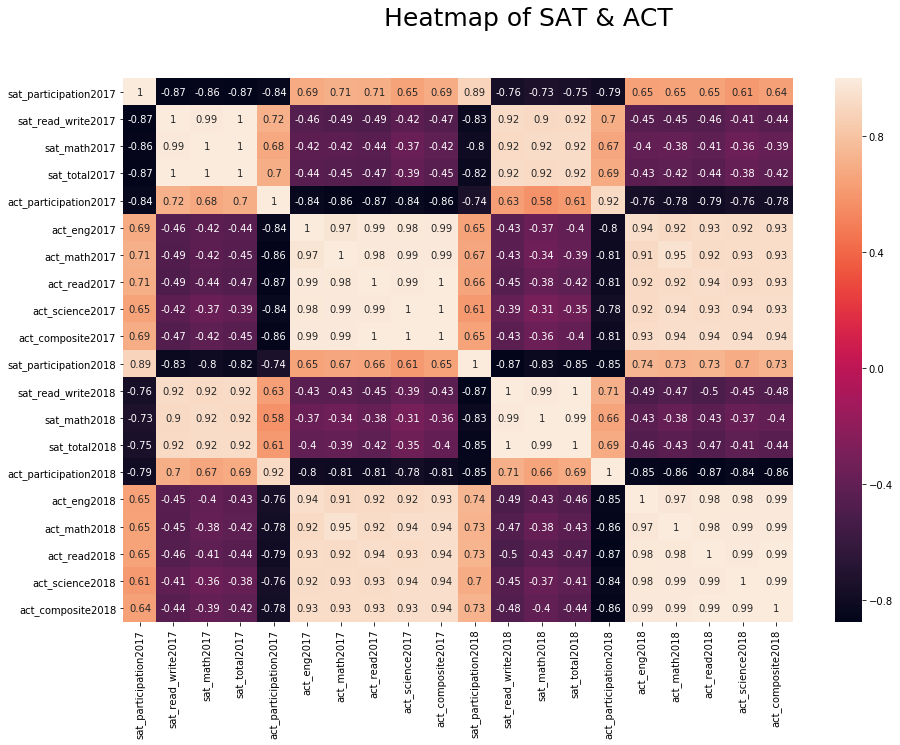

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(finalsatact01.corr(), annot=True)
plt.suptitle('Heatmap of SAT & ACT', fontsize=25)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [53]:
def subplot_histograms(finalsatact01, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(finalsatact01[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

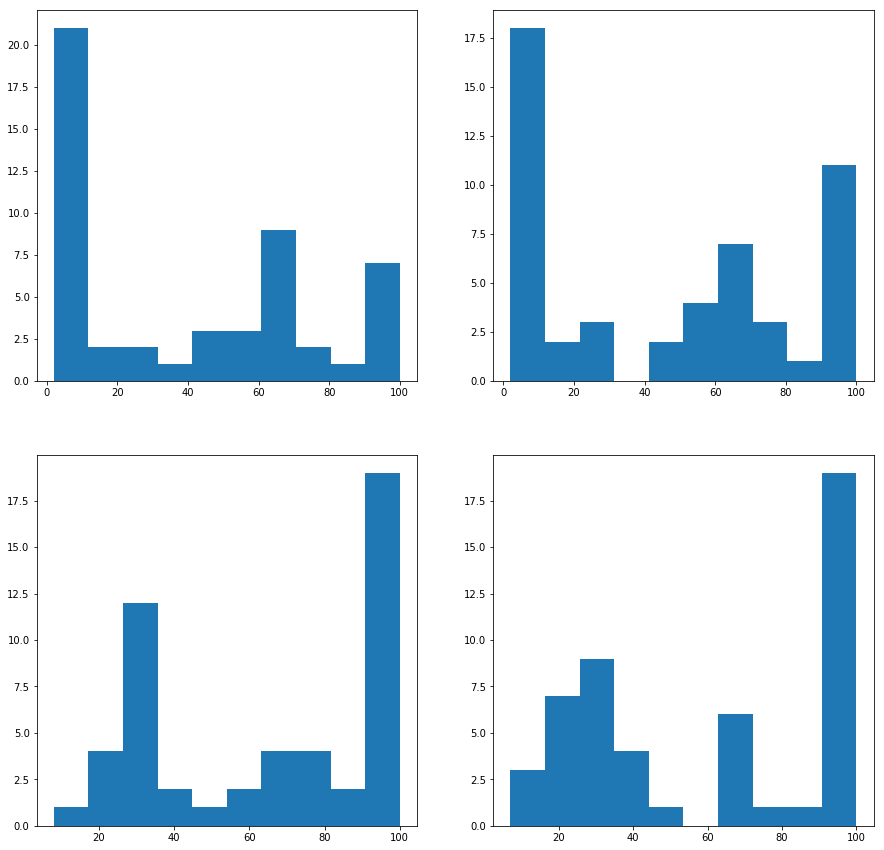

In [54]:
# Code Participation rates for SAT & ACT
subplot_histograms(finalsatact01, ['sat_participation2017','sat_participation2018', 'act_participation2017', 'act_participation2018'],
                   [],
                   [])

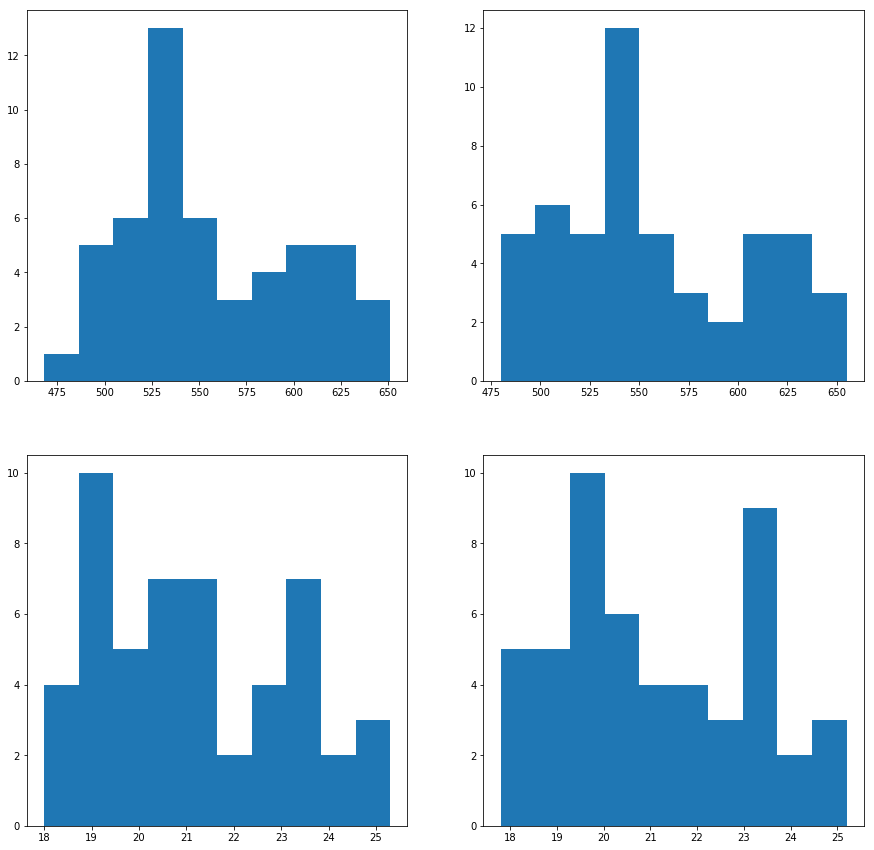

In [55]:
# Code Math for SAT & ACT
subplot_histograms(finalsatact01, ['sat_math2017','sat_math2018', 'act_math2017', 'act_math2018'],
                   [],
                   [])

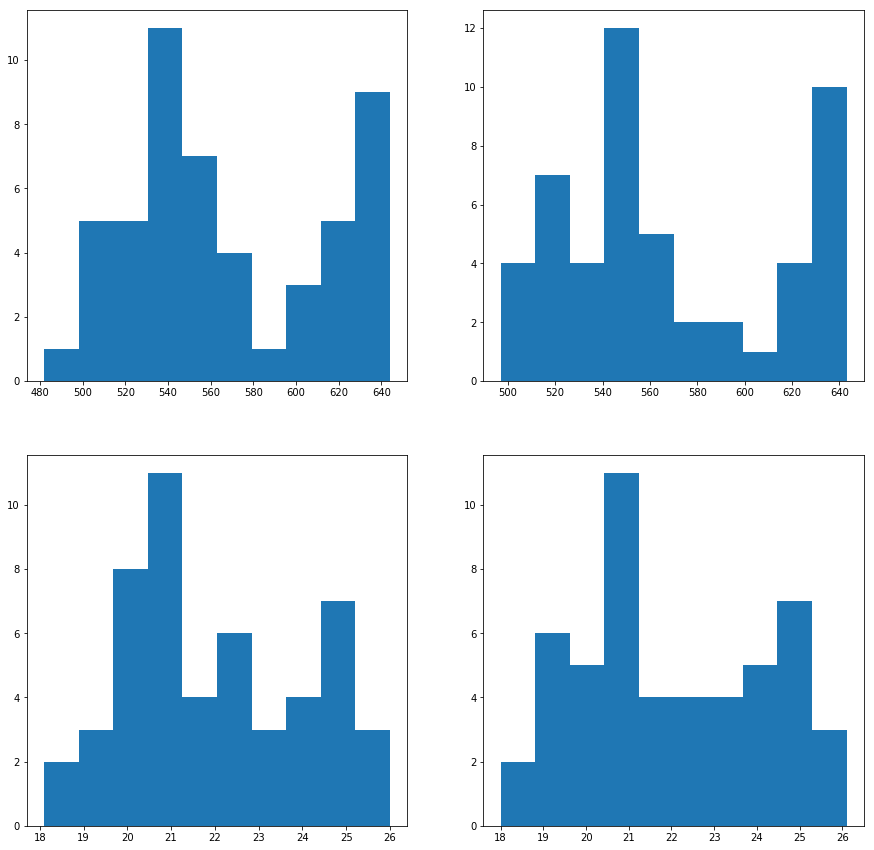

In [56]:
# Code Reading/verbal scores for SAT & ACT
subplot_histograms(finalsatact01, ['sat_read_write2017','sat_read_write2018', 'act_read2017', 'act_read2018'],
                   [],
                   [])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'Scatter Plot 2017 SAT vs ACT (Math)')

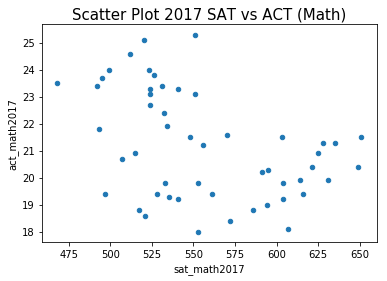

In [62]:
# Code
finalsatact01.plot(kind='scatter', x='sat_math2017', y='act_math2017');
plt.title("Scatter Plot 2017 SAT vs ACT (Math)", fontsize=15)

Text(0.5, 1.0, 'Scatter Plot 2017 SAT vs ACT (Verbal & Reading)')

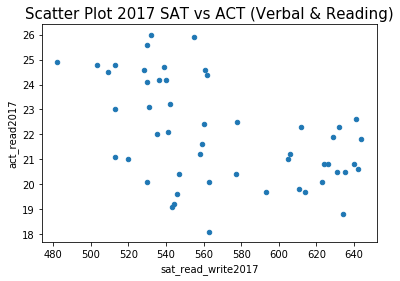

In [64]:
finalsatact01.plot(kind='scatter', x='sat_read_write2017', y='act_read2017');
plt.title("Scatter Plot 2017 SAT vs ACT (Verbal & Reading)", fontsize=15)

Text(0.5, 1.0, 'Scatter Plot 2017 SAT vs ACT (Total / Composite)')

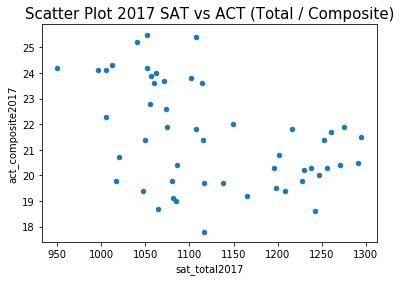

In [65]:
finalsatact01.plot(kind='scatter', x='sat_total2017', y='act_composite2017');
plt.title("Scatter Plot 2017 SAT vs ACT (Total / Composite)", fontsize=15)

Text(0.5, 1.0, 'Scatter Plot SAT2017 vs SAT2018 (Total)')

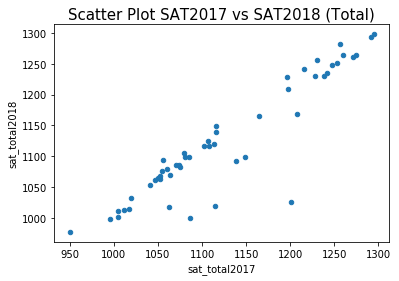

In [66]:
finalsatact01.plot(kind='scatter', x='sat_total2017', y='sat_total2018');
plt.title("Scatter Plot SAT2017 vs SAT2018 (Total)", fontsize=15)

Text(0.5, 1.0, 'Scatter Plot ACT2017 vs ACT2018 (Composite)')

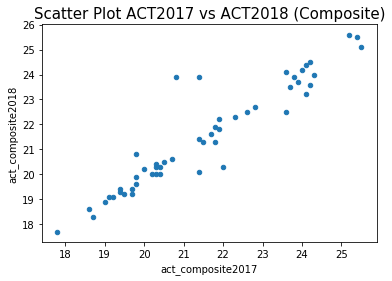

In [67]:
finalsatact01.plot(kind='scatter', x='act_composite2017', y='act_composite2018');
plt.title("Scatter Plot ACT2017 vs ACT2018 (Composite)", fontsize=15)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [84]:
# Code
sat_combined = pd.merge(SAT2017, SAT2018, how='outer', on='state')
act_combined = pd.merge(ACT2017, ACT2018, how='outer', on='state')

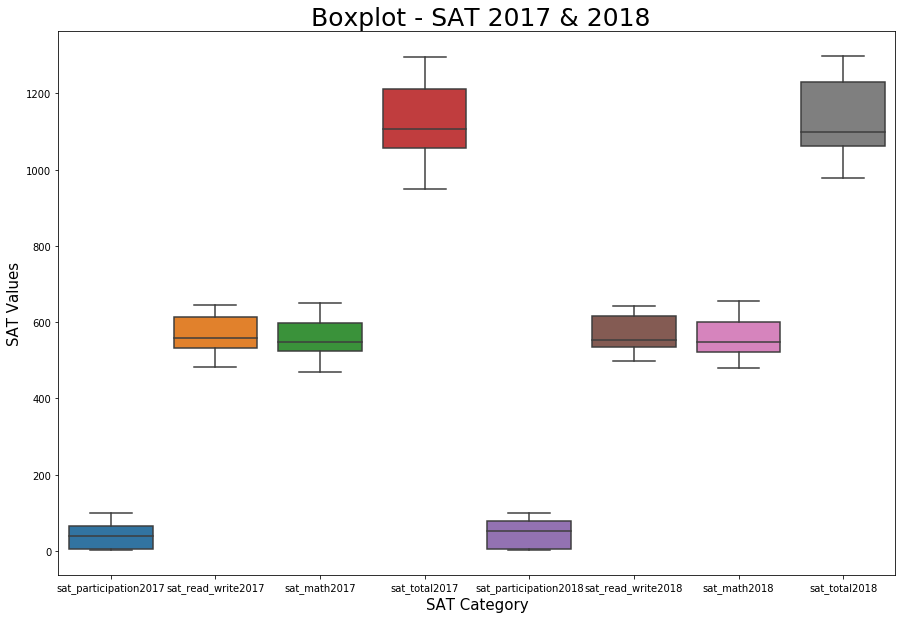

In [99]:
plt.figure(figsize=(15, 10))
plt.title(' Boxplot - SAT 2017 & 2018', fontsize=25)
plt.xlabel('SAT Category', fontsize=15)
plt.ylabel('SAT Values', fontsize=15)
sns.boxplot(data=sat_combined);

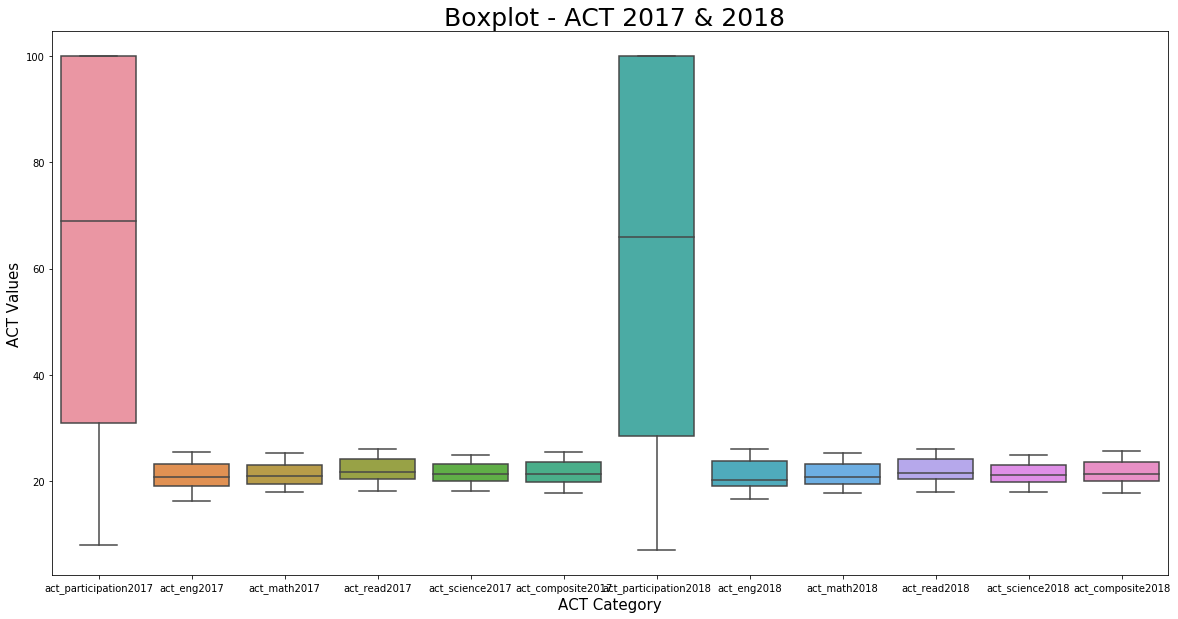

In [106]:
plt.figure(figsize=(20, 10))
plt.title(' Boxplot - ACT 2017 & 2018', fontsize=25)
plt.xlabel('ACT Category', fontsize=15)
plt.ylabel('ACT Values', fontsize=15)
sns.boxplot(data=act_combined);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

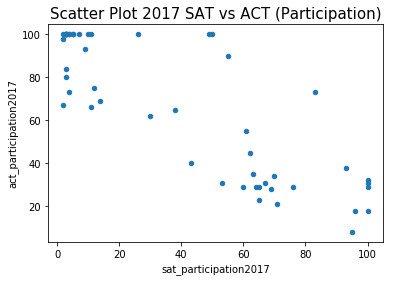

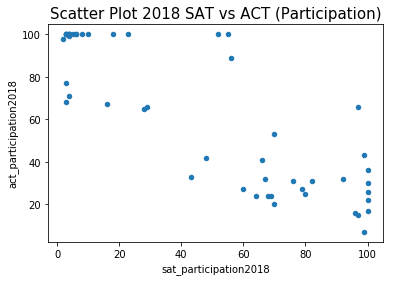

In [133]:
#Plotting participation rate of SAT & ACT
finalsatact01.plot(kind='scatter', x='sat_participation2017', y='act_participation2017');
plt.title("Scatter Plot 2017 SAT vs ACT (Participation)", fontsize=15)
finalsatact01.plot(kind='scatter', x='sat_participation2018', y='act_participation2018');
plt.title("Scatter Plot 2018 SAT vs ACT (Participation)", fontsize=15);

In [108]:
#plt.figure(figsize=(15, 10))
#plt.title(' Boxplot - SAT 2017 & 2018', fontsize=25)
#plt.xlabel('SAT Category', fontsize=15)
#plt.ylabel('SAT Values', fontsize=15)
#sns.lineplot(data=sat_combined);

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [ ]:
###

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [110]:
finalsatact01.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_read_write2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_eng2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_read2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


######Answers:######
###SAT###
#Comparing SAT "columns" (sat_participation2017 vs sat_participation2018, etc) yields a consistent result.
#The median of each column, almost the same year by year. Except for participation rate, showing an increase in 2018.
#The Q1, Q3 & IQR do not seem to be significantly different (need to do sttistical test).
#The results of Math are slightly lower & more spread compared to Evidence-Based Reading & Writing.
###########################################################################
###ACT###
#Comparing ACT "columns" (sat_participation2017 vs sat_participation2018, etc) yields a consistent result.
#The median of each column, almost the same year by year. Except for English, the median of 2018 slightly lower than 2017.
#The Q1, Q3 & IQR do not seem to be significantly different (need to do sttistical test).
#The best ACT results is Evidence-Based Reading & Writing. 
###########################################################################
###SAT vs ACT###
#Heatmap plot as well as scatter plot shows that SAT & ACT are negatively correlated. In fact comparing the raw value of SAT & #ACT is rather meaningless because both data have different scale. It will be more meaningfull to compare normalized or #rescaled SAT & ACT data.
#ACT participation is higher compared to SAT Participation

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

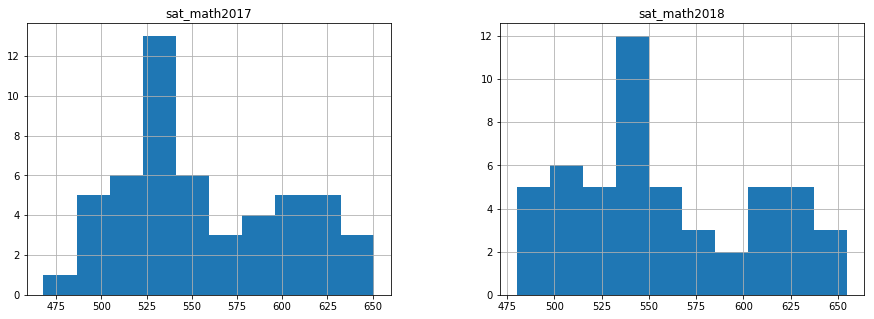

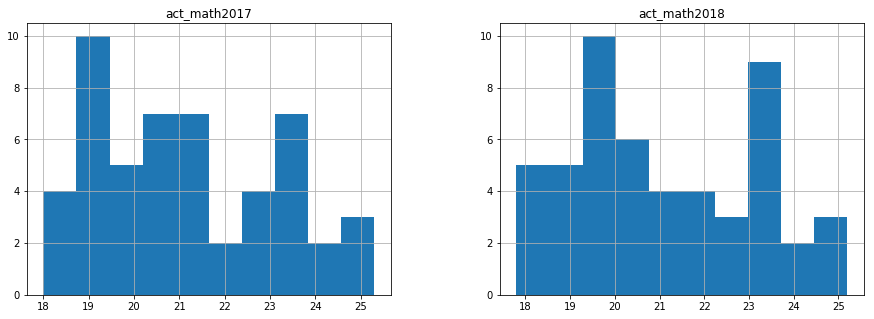

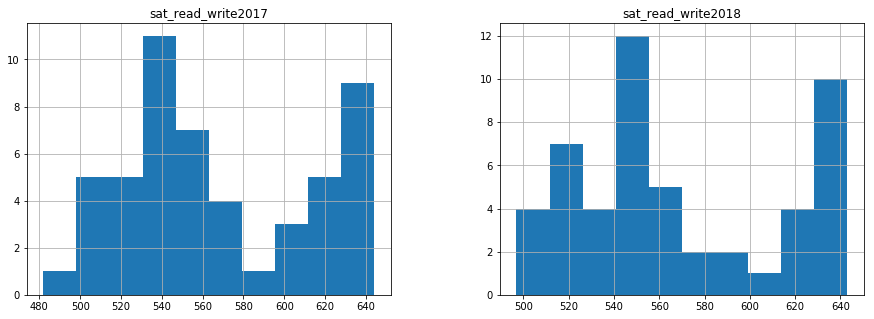

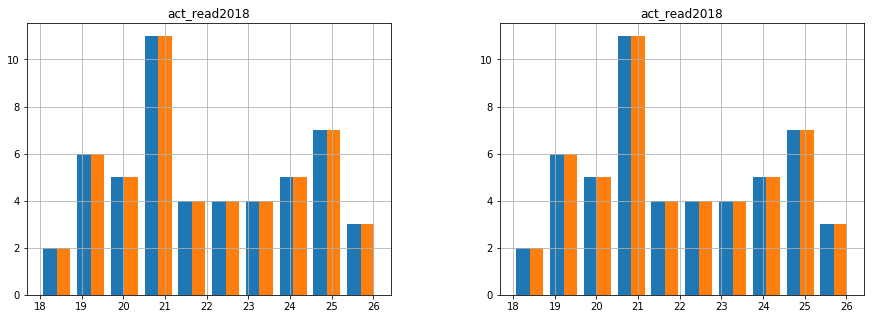

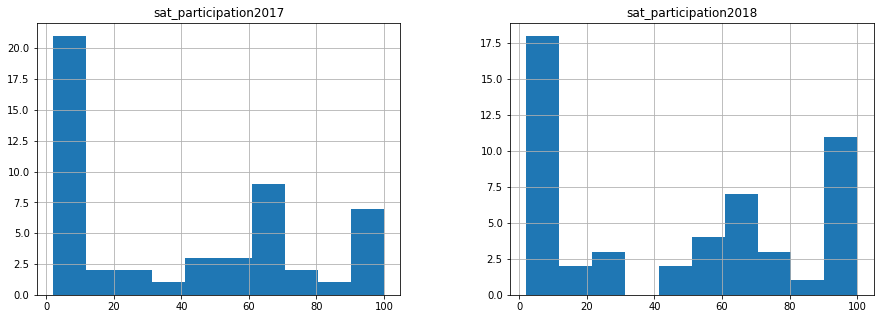

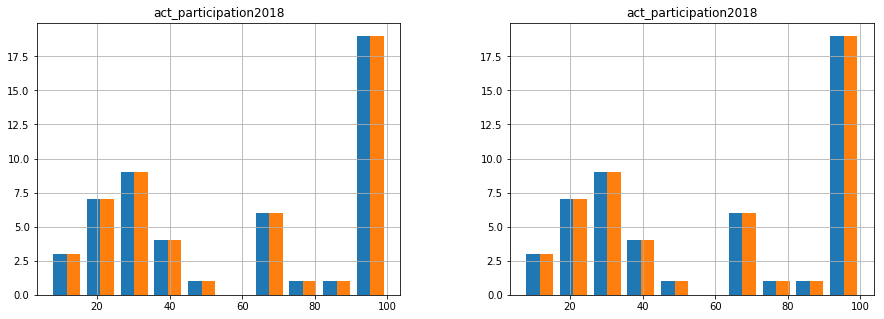

In [131]:
finalsatact01.hist(column=['sat_math2017','sat_math2018'], bins=10, figsize=(15,5))
finalsatact01.hist(column=['act_math2017','act_math2018'], bins=10, figsize=(15,5))
finalsatact01.hist(column=['sat_read_write2017','sat_read_write2018'], bins=10, figsize=(15,5))
finalsatact01.hist(column=['act_read2018','act_read2018'], bins=10, figsize=(15,5))
finalsatact01.hist(column=['sat_participation2017','sat_participation2018'], bins=10, figsize=(15,5))
finalsatact01.hist(column=['act_participation2018','act_participation2018'], bins=10, figsize=(15,5));

###Answer:###
#No. Doesn't show normal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

###Answer:###
##No. Doesn't show normal distribution. Explore non parametric statistics.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

###Answer:###
#We can make statistical conclusion between SAT & ACT given both datasets are normalized (rescaled).
#As for now, we only can conclude that ACT participation rate is > SAT participation rate. Both datasets (participation) are in the same scale.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

###Answer:###
#Not at this stage. Both datasets have to be normalised / rescaled.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

#Colorado, Illinois & Alaska (for ACT). 2018 participation dropped significantly 100% --> 30% & 93% --> 43%, 65% --> 33%.
#Colorado ==> https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/
#Switch from ACT to SAT.
#Illinois ==> https://www.chicagotribune.com/news/breaking/ct-met-illinois-act-test-scores-20181016-story.html
#Switch from ACT to SAT.
#Alaska ==> https://www.edweek.org/ew/articles/2018/10/17/math-scores-slide-to-a-20-year-low.html
#Analyst speculated that students switch from ACT to SAT, loose to compete with SAT.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [ ]:
#SAT vs ACT participation#
#In general, SAT participation increase means ACT participation decrease.
#It is subject to policy maker.
#Choose the cheaper test (operationally) & more knowledge coverage?